# Dữ liệu từ 1/9 đến 10/9

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data= pd.read_csv('Data/chuyen_khoan.csv')
data.head()

,date_time,trans_no,credit,debit,detail
0,01/09/2024_5215.97152,1,3000,0,267515.010924.122904.NGUYEN THI MAO Chuyen tien
1,01/09/2024_5219.24714,2,10000,0,018806.010924.213139.chuc mung ngay 29 nuoc co...
2,02/09/2024_5212.22965,3,10000,0,055464.020924.064157.Ung Ho Nha Nuoc Viet Nam ...
3,02/09/2024_5245.21394,4,10000,0,MBVCB.6924605040.gia dinh Dung Thuy Giang chuc...
4,02/09/2024_5078.73943,5,50000,0,MBVCB.6925071164.mung ngay quoc khanh.CT tu 10...


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200347 entries, 0 to 200346
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date_time  200347 non-null  object
 1   trans_no   200347 non-null  int64 
 2   credit     200347 non-null  int64 
 3   debit      200347 non-null  int64 
 4   detail     200347 non-null  object
dtypes: int64(3), object(2)
memory usage: 7.6+ MB


In [19]:
df=data[['date_time','credit']]
df.head()

,date_time,credit
0,01/09/2024_5215.97152,3000
1,01/09/2024_5219.24714,10000
2,02/09/2024_5212.22965,10000
3,02/09/2024_5245.21394,10000
4,02/09/2024_5078.73943,50000


In [20]:
df['credit'].sum()

135080839728

In [21]:
df['credit'].max()

1000000000

In [22]:
bins=[1000,100000,1000000,10000000,100000000,1000000000]
labels=['1,000-100,000','100,000-1,000,000','1,000,000-10,000,000','10,000,000-100,000,000','100,000,000-1,000,000,000']
# Phân chia dữ liệu
df['phan_chia']=pd.cut(df['credit'],bins=bins,labels=labels)
# tính số lượng từng khoảng và sắp xếp 
count=df['phan_chia'].value_counts().sort_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3064\1375298134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phan_chia']=pd.cut(df['credit'],bins=bins,labels=labels)


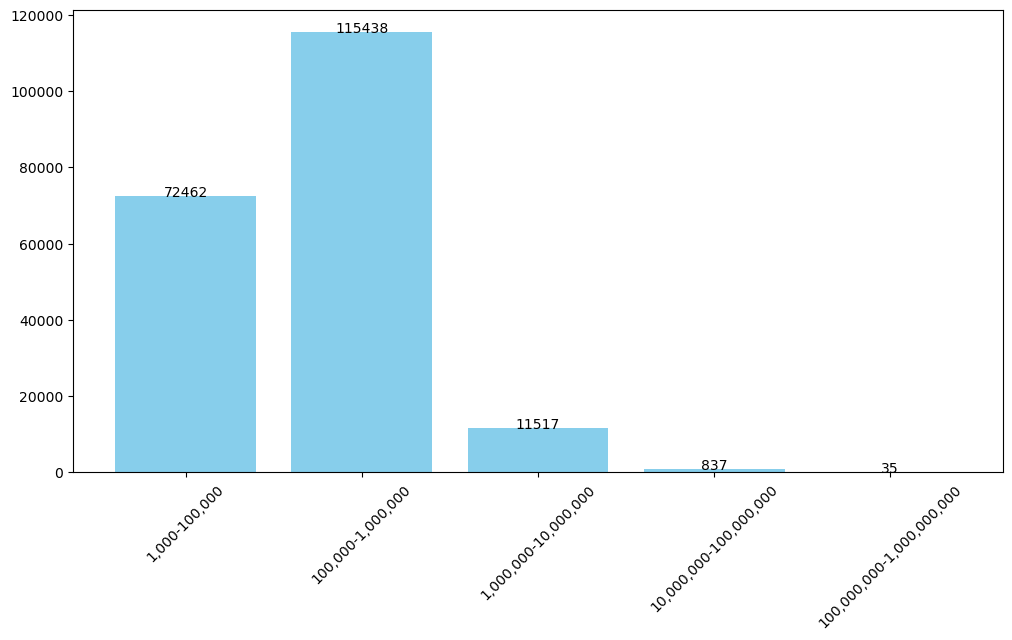

In [23]:
plt.figure(figsize=(12,6))
plt.bar(count.index,count.values,color='skyblue')
for i,value in enumerate(count):
    plt.text(i,value+1,value,ha='center')
plt.xticks(rotation=45)
plt.show()

In [24]:
count.values.sum()

200289

In [31]:
df[df['credit']>100000000].count()

date_time    35
credit       35
phan_chia    35
dtype: int64